## Import required libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import joblib
import pickle

## Load the dataset

In [2]:
df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143.0,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435.0,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215.0,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335.0,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607.0,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 7479 non-null   int64  
 1   QUARTER              7479 non-null   int64  
 2   MONTH                7479 non-null   int64  
 3   DAY_OF_MONTH         7479 non-null   int64  
 4   DAY_OF_WEEK          7479 non-null   int64  
 5   UNIQUE_CARRIER       7479 non-null   object 
 6   TAIL_NUM             7479 non-null   object 
 7   FL_NUM               7479 non-null   int64  
 8   ORIGIN_AIRPORT_ID    7479 non-null   int64  
 9   ORIGIN               7479 non-null   object 
 10  DEST_AIRPORT_ID      7479 non-null   int64  
 11  DEST                 7479 non-null   object 
 12  CRS_DEP_TIME         7479 non-null   int64  
 13  DEP_TIME             7376 non-null   float64
 14  DEP_DELAY            7376 non-null   float64
 15  DEP_DEL15            7375 non-null   f

## Performing Bivariate Analysis

### scatterplot

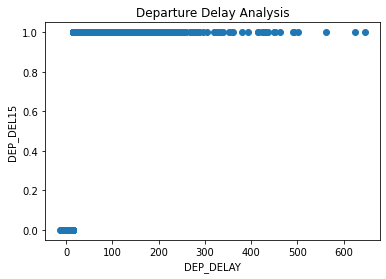

In [4]:
plt.scatter(df.DEP_DELAY, df.DEP_DEL15)
plt.title('Departure Delay Analysis')
plt.xlabel('DEP_DELAY')
plt.ylabel('DEP_DEL15')
plt.show()

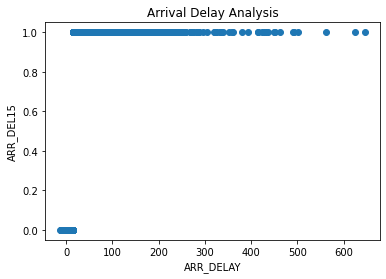

In [5]:
plt.scatter(df.DEP_DELAY, df.DEP_DEL15)
plt.title('Arrival Delay Analysis')
plt.xlabel('ARR_DELAY')
plt.ylabel('ARR_DEL15')
plt.show()

### lineplots

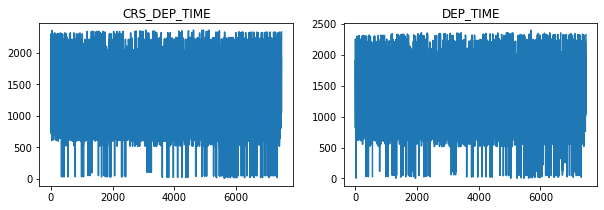

In [6]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_DEP_TIME')
plt.plot(df.CRS_DEP_TIME)
plt.subplot(1, 2, 2)
plt.title('DEP_TIME')
plt.plot(df.DEP_TIME)
plt.show()

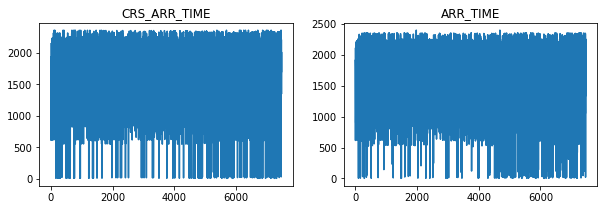

In [7]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_ARR_TIME')
plt.plot(df.CRS_ARR_TIME)
plt.subplot(1, 2, 2)
plt.title('ARR_TIME')
plt.plot(df.ARR_TIME)
plt.show()

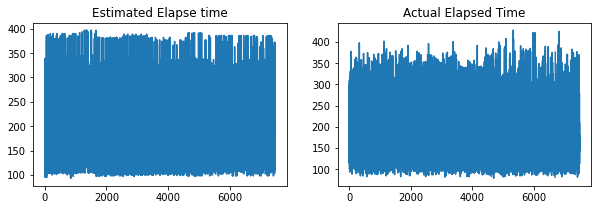

In [8]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('Estimated Elapse time')
plt.plot(df.CRS_ELAPSED_TIME)
plt.subplot(1, 2, 2)
plt.title('Actual Elapsed Time')
plt.plot(df.ACTUAL_ELAPSED_TIME)
plt.show()

## Multivariate Analysis

### pairplot

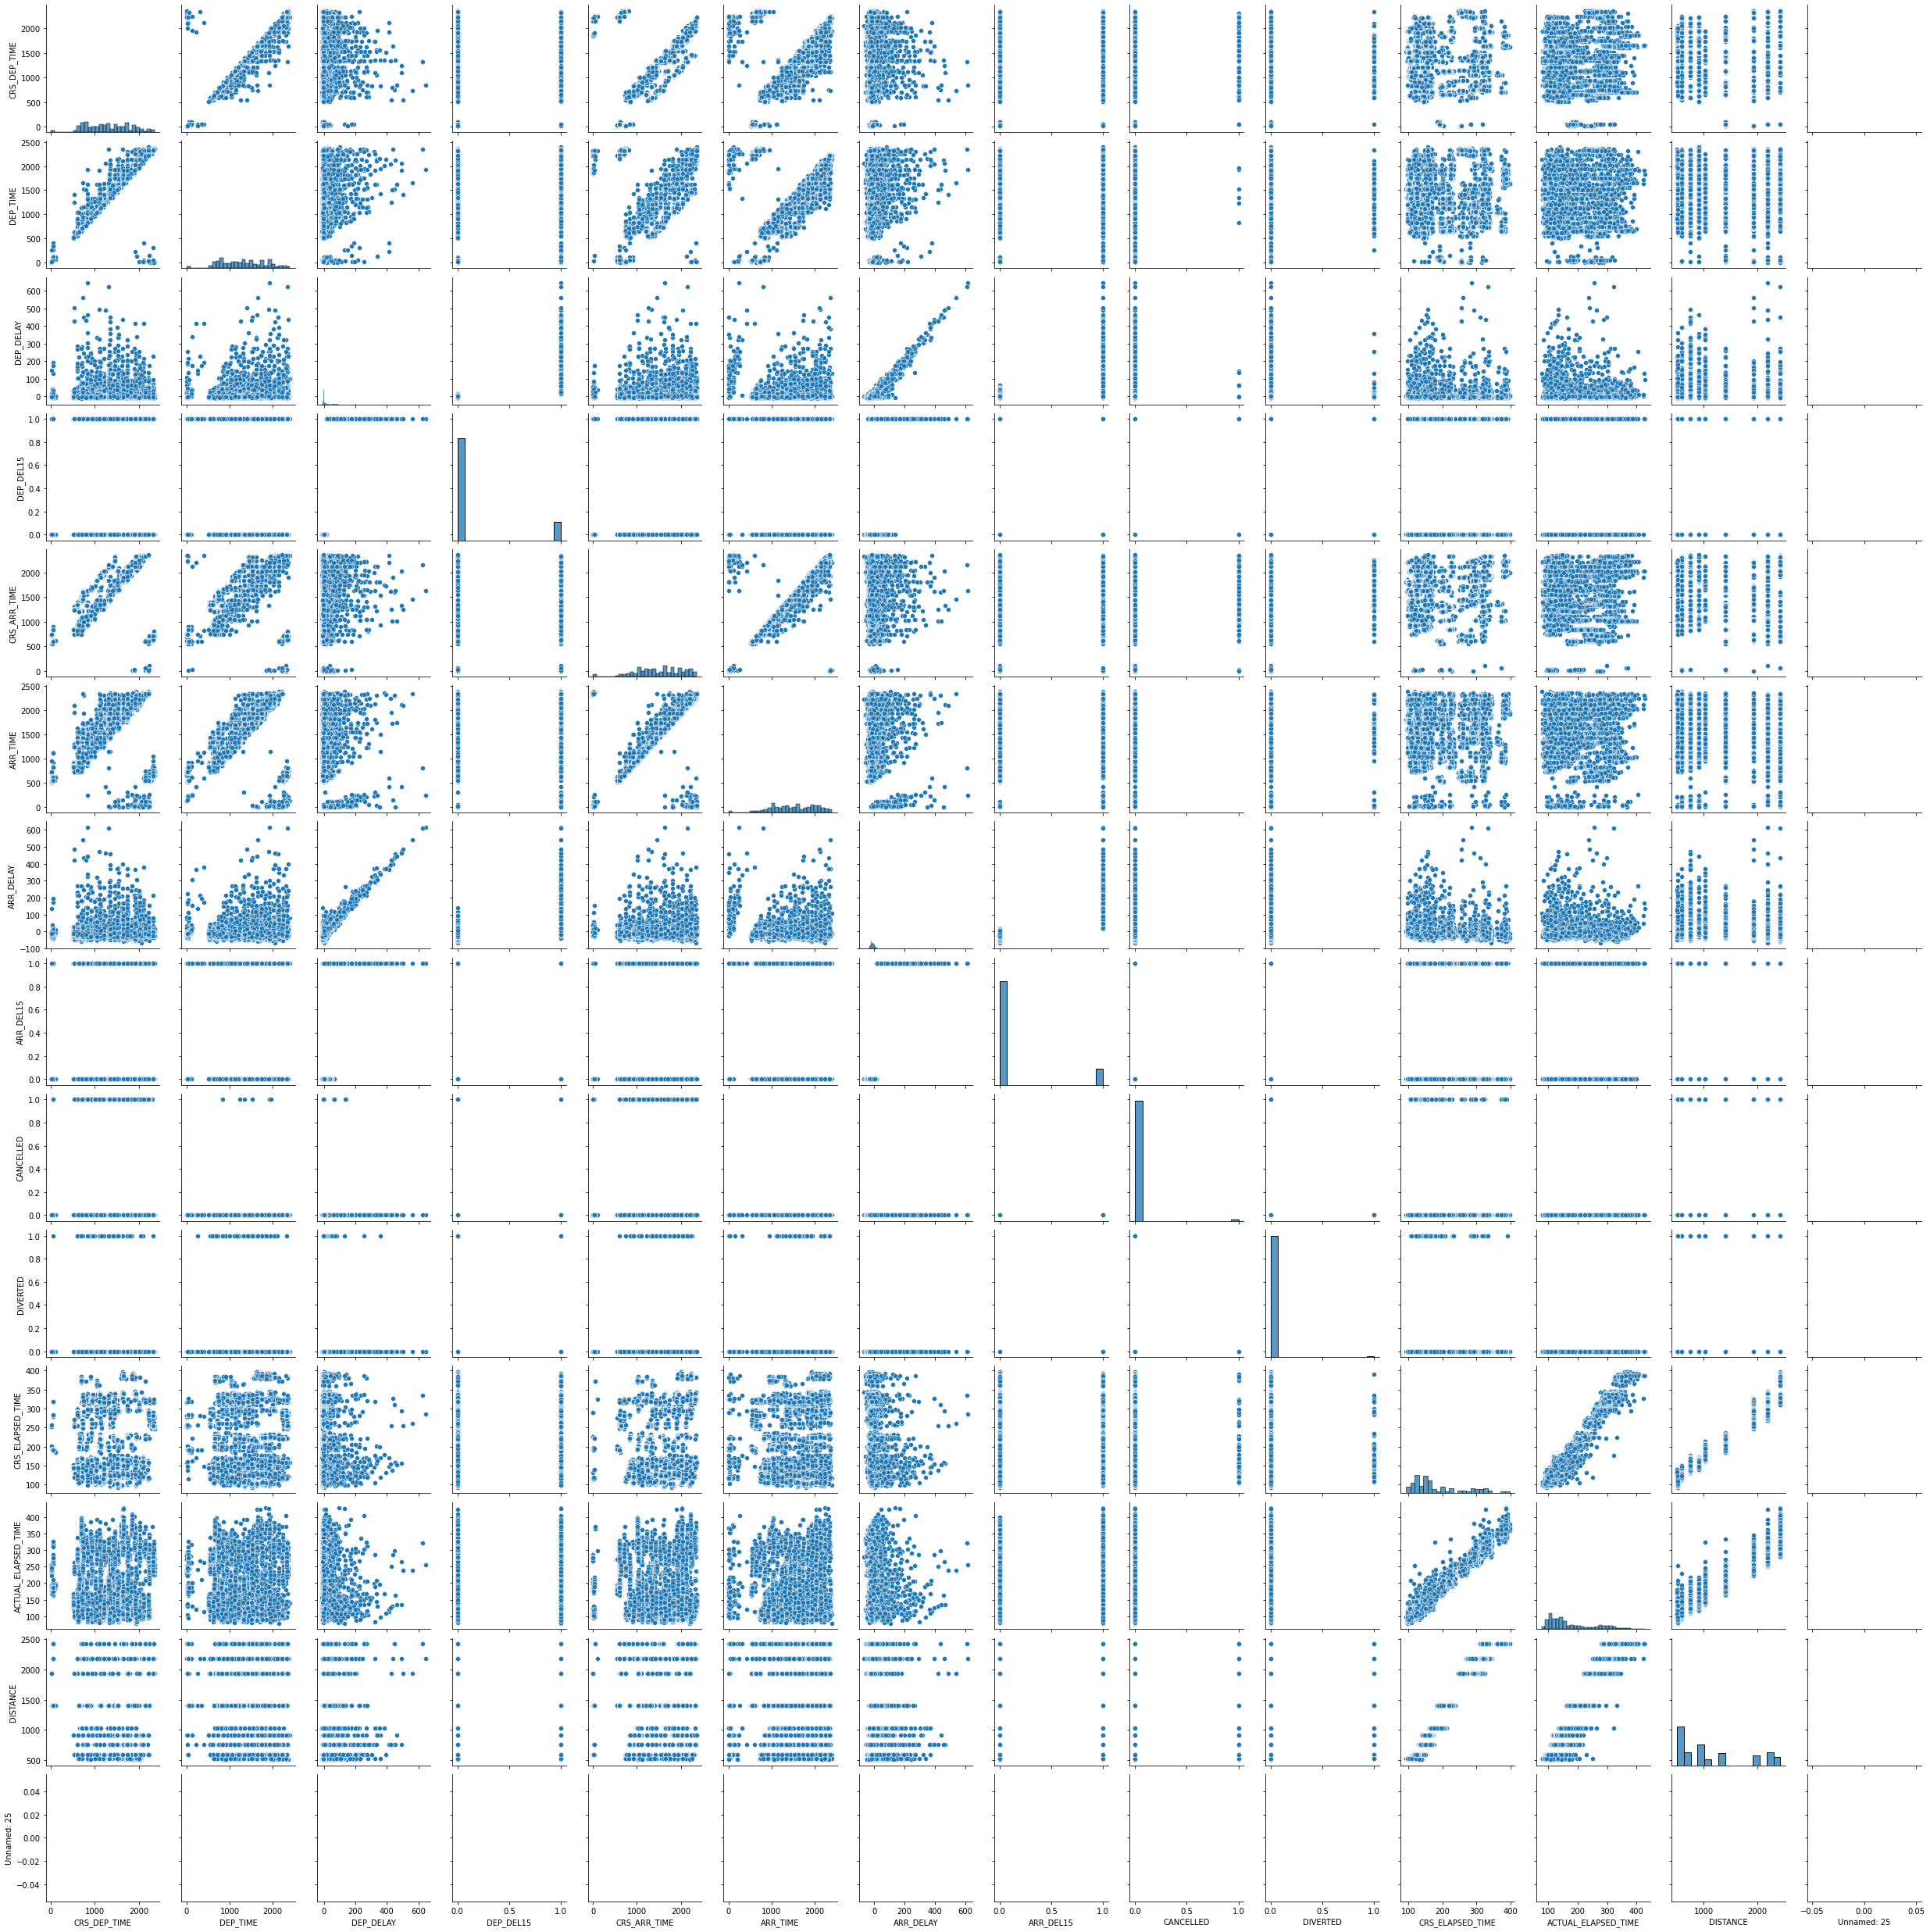

In [9]:
sb.pairplot(df.iloc[:, 12:])
plt.show()

### correlation heatmap

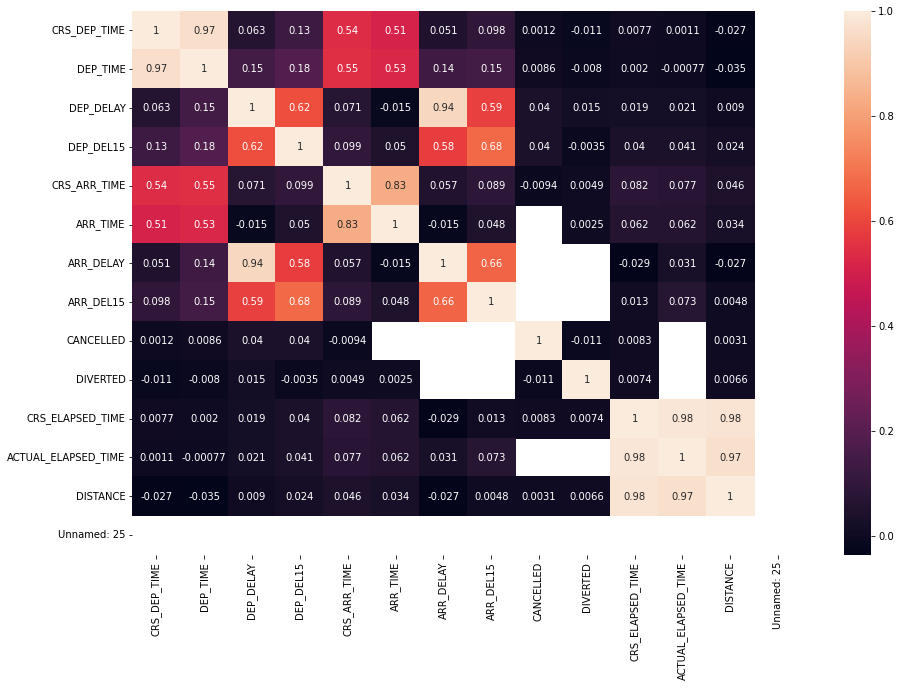

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
sb.heatmap(df.iloc[:, 12:].corr(), annot=True, ax=ax)
plt.show()

## Descriptive Analysis

In [11]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,7479.0,7479.000000,7479.000000,7479.000000,7479.00000,7479.000000,7479.000000,7479.000000,7479.000000,7376.000000,...,7478.000000,7368.000000,7312.000000,7312.000000,7478.000000,7478.000000,7478.000000,7312.000000,7478.000000,0.0
mean,2016.0,1.948924,4.718946,15.707180,3.96069,1360.552748,12330.249365,12299.015510,1311.192673,1319.047451,...,1518.660070,1506.630700,-0.915481,0.134163,0.014576,0.007622,190.149773,179.279951,1158.279219,NaN
std,0.0,0.791308,2.306810,8.738533,2.00222,800.454666,1595.610495,1599.384509,496.643253,507.152632,...,507.840831,519.489201,42.799216,0.340851,0.119856,0.086979,78.583676,77.769996,644.636638,NaN
min,2016.0,1.000000,1.000000,1.000000,1.00000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,78.000000,509.000000,NaN
25%,2016.0,1.000000,3.000000,8.000000,2.00000,721.000000,10397.000000,10397.000000,900.000000,902.000000,...,1117.000000,1115.000000,-19.000000,0.000000,0.000000,0.000000,125.000000,116.000000,594.000000,NaN
50%,2016.0,2.000000,5.000000,16.000000,4.00000,1290.000000,12478.000000,12478.000000,1315.000000,1318.000000,...,1547.000000,1537.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,7.000000,23.000000,6.00000,2032.000000,13487.000000,13487.000000,1735.000000,1737.000000,...,1945.000000,1941.250000,2.000000,0.000000,0.000000,0.000000,253.000000,235.000000,1927.000000,NaN
max,2016.0,3.000000,8.000000,31.000000,7.00000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


## Filtering required columns

In [12]:
df = df[['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_DEL15']]
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
0,1399,1,1,5,ATL,SEA,0.0,2143.0,0.0
1,1476,1,1,5,DTW,MSP,0.0,1435.0,0.0
2,1597,1,1,5,ATL,SEA,0.0,1215.0,0.0
3,1768,1,1,5,SEA,MSP,0.0,1335.0,0.0
4,1823,1,1,5,SEA,DTW,0.0,607.0,0.0


## Handling Missing Data

### Check for null values

In [13]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
DEP_DEL15        True
CRS_ARR_TIME     True
ARR_DEL15        True
dtype: bool

### Replacing null values

In [14]:
df.fillna(df['DEP_DEL15'].mode()[0], inplace=True)
df.fillna(df['ARR_DEL15'].mode()[0], inplace=True)

## Handle Outliers

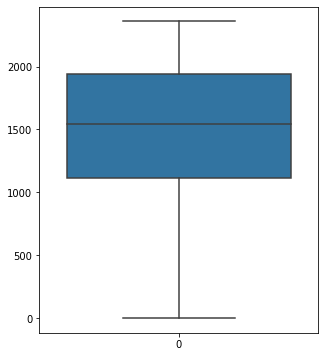

In [15]:
fig, ax = plt.subplots(figsize=(5, 6))
sb.boxplot(data=df['CRS_ARR_TIME'])
plt.show()

<b> There are no outliers </b>

## Encoding

### One Hot Encoding

In [16]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1399,1,1,5,0.0,2143.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,0.0,1435.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,0.0,1215.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,0.0,1335.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,0.0,607.0,0.0,0,0,0,0,1,0,1,0,0,0


In [17]:
df.columns

Index(['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DEL15',
       'CRS_ARR_TIME', 'ARR_DEL15', 'ORIGIN_ATL', 'ORIGIN_DTW', 'ORIGIN_JFK',
       'ORIGIN_MSP', 'ORIGIN_SEA', 'DEST_ATL', 'DEST_DTW', 'DEST_JFK',
       'DEST_MSP', 'DEST_SEA'],
      dtype='object')

## Splitting dataset into Independent and Dependent Variables

In [18]:
X = df.drop(columns=['ARR_DEL15'])
Y = df[['ARR_DEL15']]

## Convert Independent and Dependent Values as 1D Arrays

In [19]:
X = X.values
Y = Y.values

## Splitting dataset into Train and Test datasets

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5983, 16), (1496, 16), (5983, 1), (1496, 1))

## Build the Machine Learning Models

### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train.ravel())

DecisionTreeClassifier()

### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15, max_depth=3)
rf.fit(X_train, Y_train.ravel())

RandomForestClassifier(max_depth=3, n_estimators=15)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=800)
log_reg.fit(X_train, Y_train.ravel())

LogisticRegression(max_iter=800)

## Testing the Models

### Decision Tree Classifier

In [25]:
Y_pred_clf_train = clf.predict(X_train)
Y_pred_clf_test = clf.predict(X_test)

In [26]:
pd.DataFrame(Y_pred_clf_train).value_counts()

0.0    5195
1.0     788
dtype: int64

In [27]:
pd.DataFrame(Y_pred_clf_test).value_counts()

0.0    1292
1.0     204
dtype: int64

### Random Forest Classifier

In [28]:
Y_pred_rf_train = rf.predict(X_train)
Y_pred_rf_test = rf.predict(X_test)

In [29]:
pd.DataFrame(Y_pred_rf_train).value_counts()

0.0    5711
1.0     272
dtype: int64

In [30]:
pd.DataFrame(Y_pred_rf_test).value_counts()

0.0    1425
1.0      71
dtype: int64

### Logistic Regression

In [31]:
Y_pred_log_train = log_reg.predict(X_train)
Y_pred_log_test = log_reg.predict(X_test)

In [32]:
pd.DataFrame(Y_pred_log_train).value_counts()

0.0    5103
1.0     880
dtype: int64

In [33]:
pd.DataFrame(Y_pred_log_test).value_counts()

0.0    1271
1.0     225
dtype: int64

## Evaluating the ML Models using Metrics

### Decision Tree Classifier

##### Classification Report

In [34]:
print(classification_report(Y_test, Y_pred_clf_test))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      1303
         1.0       0.52      0.55      0.53       193

    accuracy                           0.88      1496
   macro avg       0.73      0.74      0.73      1496
weighted avg       0.88      0.88      0.88      1496



##### Accuracy, Precision, Recall, F1 Score

In [35]:
acc_clf = accuracy_score(Y_test, Y_pred_clf_test)
prec_clf, rec_clf, f1_clf, sup_clf = precision_recall_fscore_support(Y_test, Y_pred_clf_test)
print('Accuracy Score =', acc_clf)
print('Precision =', prec_clf[0])
print('Recall =', rec_clf[0])
print('F1 Score =', f1_clf[0])

Accuracy Score = 0.8763368983957219
Precision = 0.9326625386996904
Recall = 0.9247889485801996
F1 Score = 0.928709055876686


##### Checking for Overfitting and Underfitting

In [36]:
clf_train_acc = accuracy_score(Y_train, Y_pred_clf_train)
clf_test_acc = accuracy_score(Y_test, Y_pred_clf_test)
print('Training Accuracy =', clf_train_acc)
print('Testing Accuracy =', clf_test_acc)

Training Accuracy = 1.0
Testing Accuracy = 0.8763368983957219


<p><b>There is significant variation in the training and testing accuracy. The training accuracy is much greater when compared to the testing accuracy. Therefore, the Decision Tree Classifier model is overfit.</b></p>

##### Confusion Matrix

In [37]:
pd.crosstab(Y_test.ravel(), Y_pred_clf_test)

col_0,0.0,1.0
row_0,,
0.0,1205,98
1.0,87,106


### Random Forest Classifier

##### Classification Report

In [38]:
print(classification_report(Y_test, Y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1303
         1.0       0.73      0.27      0.39       193

    accuracy                           0.89      1496
   macro avg       0.82      0.63      0.67      1496
weighted avg       0.88      0.89      0.87      1496



##### Accuracy, Precision, Recall, F1 Score

In [39]:
acc_rf = accuracy_score(Y_test, Y_pred_rf_test)
prec_rf, rec_rf, f1_rf, sup_rf = precision_recall_fscore_support(Y_test, Y_pred_rf_test)
print('Accuracy Score =', acc_rf)
print('Precision =', prec_rf[0])
print('Recall =', rec_rf[0])
print('F1 Score =', f1_rf[0])

Accuracy Score = 0.893048128342246
Precision = 0.9010526315789473
Recall = 0.985418265541059
F1 Score = 0.9413489736070381


##### Checking for Overfitting and Underfitting

In [40]:
rf_train_acc = accuracy_score(Y_train, Y_pred_rf_train)
rf_test_acc = accuracy_score(Y_test, Y_pred_rf_test)
print('Training Accuracy =', rf_train_acc)
print('Testing Accuracy =', rf_test_acc)

Training Accuracy = 0.8913588500752131
Testing Accuracy = 0.893048128342246


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Random Forest Classifier model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [41]:
pd.crosstab(Y_test.ravel(), Y_pred_rf_test)

col_0,0.0,1.0
row_0,,
0.0,1284,19
1.0,141,52


### Logistic Regression

##### Classification Report

In [42]:
print(classification_report(Y_test, Y_pred_log_test))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1303
         1.0       0.66      0.77      0.71       193

    accuracy                           0.92      1496
   macro avg       0.81      0.85      0.83      1496
weighted avg       0.93      0.92      0.92      1496



##### Accuracy, Precision, Recall, F1 Score

In [43]:
acc_log = accuracy_score(Y_test, Y_pred_log_test)
prec_log, rec_log, f1_log, sup_log = precision_recall_fscore_support(Y_test, Y_pred_log_test)
print('Accuracy Score =', acc_log)
print('Precision =', prec_log[0])
print('Recall =', rec_log[0])
print('F1 Score =', f1_log[0])

Accuracy Score = 0.9184491978609626
Precision = 0.964594807238395
Recall = 0.9409056024558711
F1 Score = 0.9526029526029527


##### Checking for Overfitting and Underfitting

In [44]:
log_train_acc = accuracy_score(Y_train, Y_pred_log_train)
log_test_acc = accuracy_score(Y_test, Y_pred_log_test)
print('Training Accuracy =', log_train_acc)
print('Testing Accuracy =', log_test_acc)

Training Accuracy = 0.9201069697476183
Testing Accuracy = 0.9184491978609626


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Logistic Regression model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [45]:
pd.crosstab(Y_test.ravel(), Y_pred_log_test)

col_0,0.0,1.0
row_0,,
0.0,1226,77
1.0,45,148


<h3 style="font-style:italic"> On comparing the three models built, based on its performance metrics it is clear that Logistic Regression Model gives the highest performance. Hence, that model is chosen for deployment </h3>

## Hyper Parameter Tuning

### Tuning the Hyper Parameters of Logistic Regression

In [46]:
parameters = { 'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'C':[100, 10, 1.0, 0.1, 0.01],
             'penalty':['l2']}

In [47]:
tuned_model = GridSearchCV(LogisticRegression(max_iter=800), param_grid=parameters, verbose=2)
tuned_model.fit(X_train, Y_train.ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solv

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.6s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.8s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.6s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ...................

GridSearchCV(estimator=LogisticRegression(max_iter=800),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

### Testing the Tuned Model

In [48]:
Y_pred_tun_train = tuned_model.predict(X_train)
Y_pred_tun_test = tuned_model.predict(X_test)

In [49]:
pd.DataFrame(Y_pred_tun_train).value_counts()

0.0    5103
1.0     880
dtype: int64

In [50]:
pd.DataFrame(Y_pred_tun_test).value_counts()

0.0    1272
1.0     224
dtype: int64

### Evaluating the Tuned Model using Metrics

##### Classification Report

In [51]:
print(classification_report(Y_test, Y_pred_tun_test))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1303
         1.0       0.66      0.76      0.71       193

    accuracy                           0.92      1496
   macro avg       0.81      0.85      0.83      1496
weighted avg       0.92      0.92      0.92      1496



##### Accuracy, Precision, Recall, F1 Score

In [52]:
acc_tun = accuracy_score(Y_test, Y_pred_tun_test)
prec_tun, rec_tun, f1_tun, sup_tun = precision_recall_fscore_support(Y_test, Y_pred_tun_test)
print('Accuracy Score =', acc_tun)
print('Precision =', prec_tun[0])
print('Recall =', rec_tun[0])
print('F1 Score =', f1_tun[0])

Accuracy Score = 0.9177807486631016
Precision = 0.9638364779874213
Recall = 0.9409056024558711
F1 Score = 0.9522330097087378


##### Checking for Overfitting and Underfitting

In [53]:
tun_train_acc = accuracy_score(Y_train, Y_pred_tun_train)
tun_test_acc = accuracy_score(Y_test, Y_pred_tun_test)
print('Training Accuracy =', tun_train_acc)
print('Testing Accuracy =', tun_test_acc)

Training Accuracy = 0.9191041283636971
Testing Accuracy = 0.9177807486631016


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Tuned Logistic Regression model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [54]:
pd.crosstab(Y_test.ravel(), Y_pred_tun_test)

col_0,0.0,1.0
row_0,,
0.0,1226,77
1.0,46,147


<h3 style="font-style:italic"> There is not much improvement in the Logistic Regression model after Hyper Parameter Tuning. Hence model is unchanged. </h3>

## Saving the model as pickle file

In [55]:
joblib.dump(log_reg, 'model.pkl')

['model.pkl']